In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

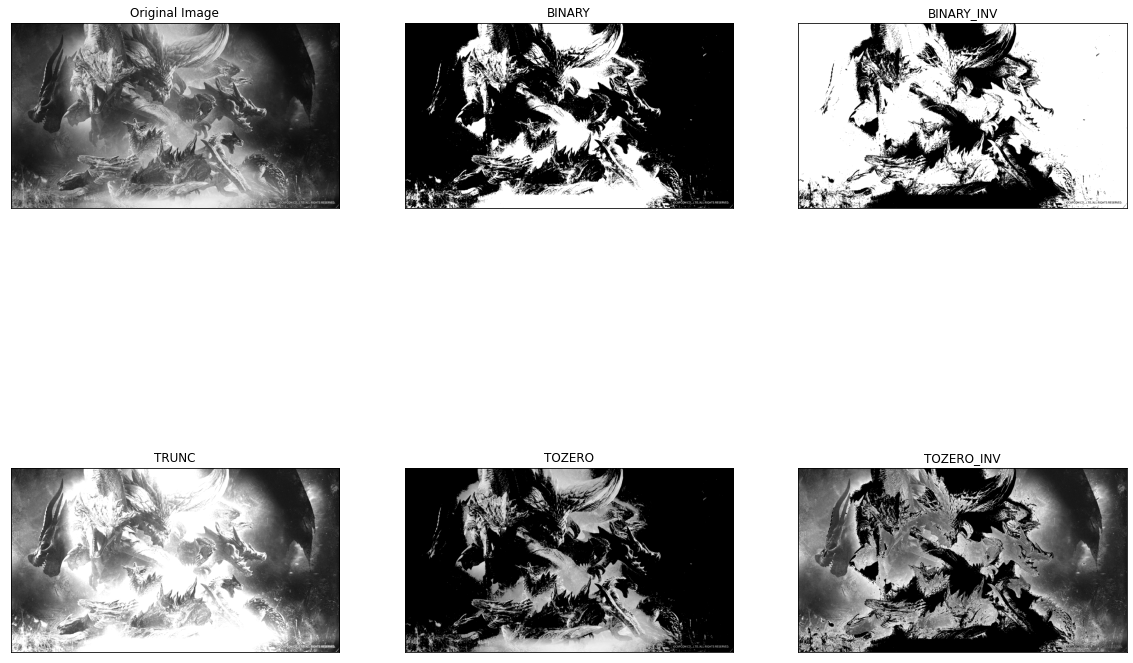

In [7]:
img = cv2.imread('test2.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [18]:
h,w=256,512
img=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=j%256

In [19]:
cv2.imshow('image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

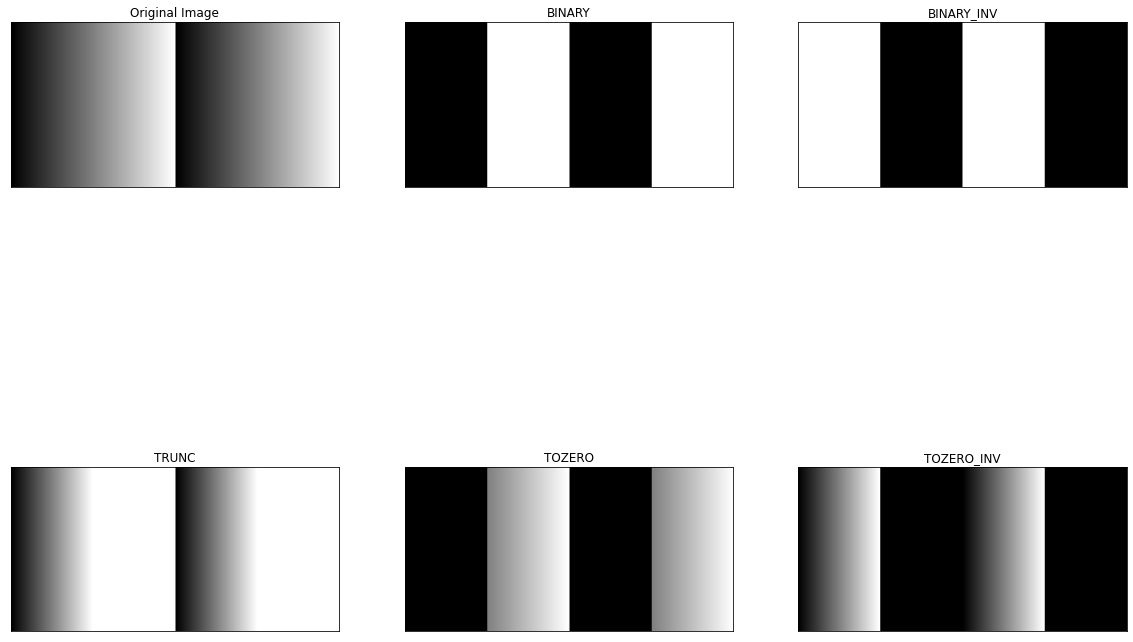

In [20]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [35]:
##Adaptive Thresholding
import cv2
import numpy as np
from matplotlib import pyplot as plt


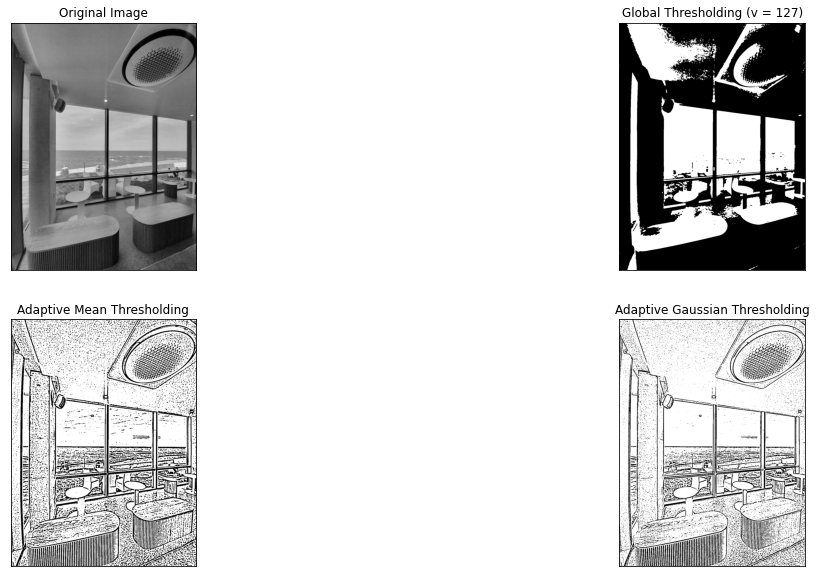

In [30]:
img = cv2.imread('test5.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


## Otsu’s Binarization

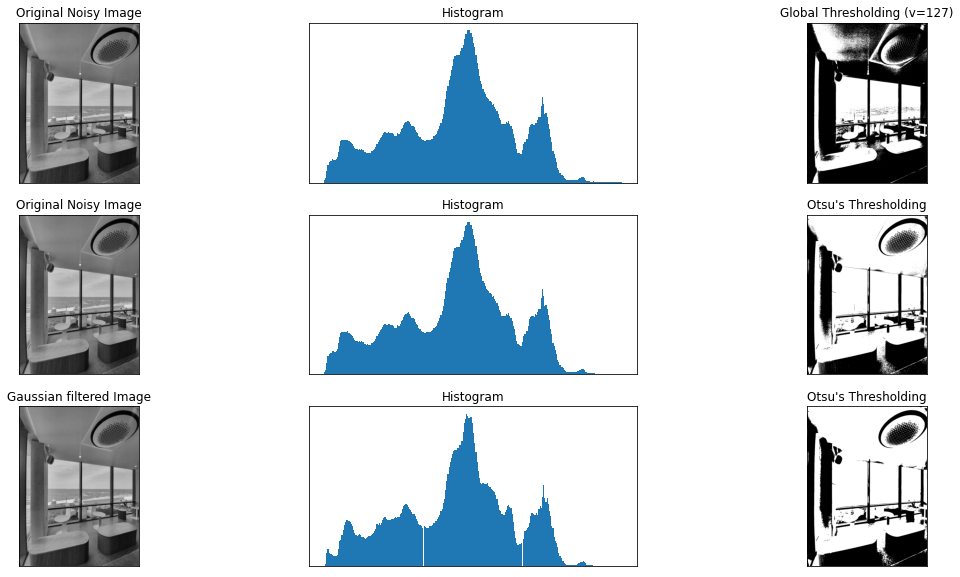

In [38]:
img = cv2.imread('test5.jpg',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
        img, 0, th2,
        blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
        'Original Noisy Image','Histogram',"Otsu's Thresholding",
        'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


## Histogram

In [39]:
img = cv2.imread('test5.jpg',0)

In [47]:
h,w=img.shape

In [48]:
hist=np.zeros(256, np.uint32)

In [49]:
for i in range(h):
    for j in range(w):
        hist[img[i,j]]+=1

In [50]:
hist

array([  274,   592,  1419,  2284,  2657,  2713,  2786,  3003,  2920,
        2851,  3007,  3293,  3936,  4709,  5243,  5362,  5363,  5437,
        5397,  5437,  5467,  5295,  5120,  5039,  4901,  4594,  4409,
        4242,  4208,  4130,  4245,  4146,  4246,  4099,  3857,  3832,
        3792,  3813,  3732,  3762,  3986,  4024,  4110,  4224,  4466,
        4885,  5194,  5381,  5617,  5757,  6038,  6261,  6454,  6261,
        6296,  6429,  6354,  6305,  6255,  6152,  5915,  5875,  5948,
        6289,  6207,  6436,  6804,  6937,  7332,  7518,  7733,  7839,
        7887,  7723,  7406,  7220,  7229,  7030,  6650,  6392,  6250,
        5954,  5758,  5586,  5451,  5420,  5303,  5228,  5368,  5395,
        5402,  5452,  5525,  5602,  5865,  6023,  6198,  6529,  6822,
        7239,  7616,  8053,  8737,  9614, 10657, 11605, 12316, 12983,
       13597, 14295, 14870, 15702, 16069, 16252, 16233, 16177, 16270,
       16689, 17113, 17500, 18252, 18837, 18941, 19364, 19350, 18999,
       19067, 18521,